In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten, Dense, Rescaling
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import splitfolders

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
path="/kaggle/input/facial-emotion-expressions/images"
os.listdir(path)

['validation', 'images', 'train']

In [5]:
directory="data"
os.mkdir(directory)

In [6]:
angry="/kaggle/working/data/angry"
disgust="/kaggle/working/data/disgust"
fear="/kaggle/working/data/fear"
happy="/kaggle/working/data/happy"
neutral="/kaggle/working/data/neutral"
sad="/kaggle/working/data/sad"
surprise="/kaggle/working/data/surprise"
emotions=[angry,disgust,fear,happy,neutral,sad,surprise]

In [7]:
for i in emotions:
    os.mkdir(i)

In [8]:
z=0

In [9]:
for i in os.listdir("/kaggle/input/facial-emotion-expressions/images/images/train"):
    for j in os.listdir("/kaggle/input/facial-emotion-expressions/images/images/train/"+i):
        im=cv2.imread("/kaggle/input/facial-emotion-expressions/images/images/train/"+i+"/"+j)
        cv2.imwrite("/kaggle/working/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [10]:
for i in os.listdir("/kaggle/input/facial-emotion-expressions/images/images/validation"):
    for j in os.listdir("/kaggle/input/facial-emotion-expressions/images/images/validation/"+i):
        im=cv2.imread("/kaggle/input/facial-emotion-expressions/images/images/validation/"+i+"/"+j)
        cv2.imwrite("/kaggle/working/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [11]:
for i in os.listdir("/kaggle/input/facial-emotion-expressions/images/train"):
    for j in os.listdir("/kaggle/input/facial-emotion-expressions/images/train/"+i):
        im=cv2.imread("/kaggle/input/facial-emotion-expressions/images/train/"+i+"/"+j)
        cv2.imwrite("/kaggle/working/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [12]:
for i in os.listdir("/kaggle/input/facial-emotion-expressions/images/validation"):
    for j in os.listdir("/kaggle/input/facial-emotion-expressions/images/validation/"+i):
        im=cv2.imread("/kaggle/input/facial-emotion-expressions/images/images/validation/"+i+"/"+j)
        cv2.imwrite("/kaggle/working/data/"+i+"/"+str(z).zfill(5)+".jpg",im)
        z+=1

In [13]:
for i in os.listdir("/kaggle/working/data"):
    print("=>"+i+" folder contains: "+str(len(os.listdir("/kaggle/working/data/"+i)))+" images")

=>surprise folder contains: 8004 images
=>disgust folder contains: 1094 images
=>neutral folder contains: 12396 images
=>happy folder contains: 17978 images
=>angry folder contains: 9906 images
=>sad folder contains: 12154 images
=>fear folder contains: 10242 images


In [14]:
splitfolders.ratio('/kaggle/working/data', output="newData", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 71774 files [00:09, 7184.09 files/s]


In [15]:
datasetPath="/kaggle/working/newData/"

In [16]:
for i in os.listdir(datasetPath):
    print("==> "+i+" folder contains:")
    for j in os.listdir(datasetPath+i):
        print("\t => "+j+" folder contains: "+str(len(os.listdir(datasetPath+i+"/"+j)))+" images.")

==> test folder contains:
	 => surprise folder contains: 801 images.
	 => disgust folder contains: 110 images.
	 => neutral folder contains: 1241 images.
	 => happy folder contains: 1799 images.
	 => angry folder contains: 992 images.
	 => sad folder contains: 1216 images.
	 => fear folder contains: 1025 images.
==> train folder contains:
	 => surprise folder contains: 6403 images.
	 => disgust folder contains: 875 images.
	 => neutral folder contains: 9916 images.
	 => happy folder contains: 14382 images.
	 => angry folder contains: 7924 images.
	 => sad folder contains: 9723 images.
	 => fear folder contains: 8193 images.
==> val folder contains:
	 => surprise folder contains: 800 images.
	 => disgust folder contains: 109 images.
	 => neutral folder contains: 1239 images.
	 => happy folder contains: 1797 images.
	 => angry folder contains: 990 images.
	 => sad folder contains: 1215 images.
	 => fear folder contains: 1024 images.


In [17]:
imageSize=(48,48)

In [18]:
X_train=[]
X_test=[]
X_val=[]
y_train=[]
y_test=[]
y_val=[]

In [19]:
for i in os.listdir(datasetPath+"train"):
    for j in os.listdir(datasetPath+"train/"+i):
        im=cv2.imread(datasetPath+"train/"+i+"/"+j)
        image=cv2.resize(im,imageSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_train.append(img)
        y_train.append(i)

In [20]:
for i in os.listdir(datasetPath+"test"):
    for j in os.listdir(datasetPath+"test/"+i):
        im=cv2.imread(datasetPath+"test/"+i+"/"+j)
        image=cv2.resize(im,imageSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_test.append(img)
        y_test.append(i)

In [21]:
for i in os.listdir(datasetPath+"val"):
    for j in os.listdir(datasetPath+"val/"+i):
        im=cv2.imread(datasetPath+"val/"+i+"/"+j)
        image=cv2.resize(im,imageSize)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        X_val.append(img)
        y_val.append(i)

In [22]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
print(len(X_val),len(y_val))

57416 57416
7184 7184
7174 7174


In [23]:
def myfunction():
    return 0.3

In [24]:
random.shuffle(X_train, myfunction)
random.shuffle(y_train, myfunction)
random.shuffle(X_test, myfunction)
random.shuffle(y_test, myfunction)
random.shuffle(X_val, myfunction)
random.shuffle(y_val, myfunction)

/tmp/ipykernel_35/3532553016.py:1: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(X_train, myfunction)
/tmp/ipykernel_35/3532553016.py:2: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(y_train, myfunction)
/tmp/ipykernel_35/3532553016.py:3: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(X_test, myfunction)
/tmp/ipykernel_35/3532553016.py:4: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(y_test, myfunction)
/tmp/ipykernel_35/3532553016.py:5: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subse

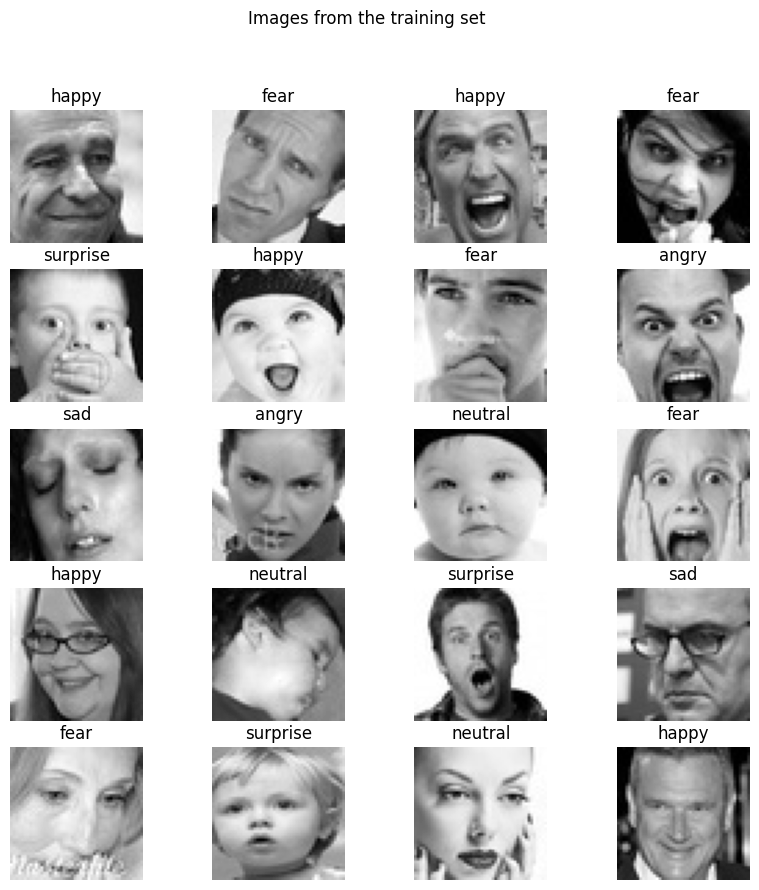

In [25]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_train))
    plt.imshow(X_train[a],cmap="gray")
    plt.title(y_train[a])
    plt.axis("off")
plt.suptitle("Images from the training set")
plt.show()

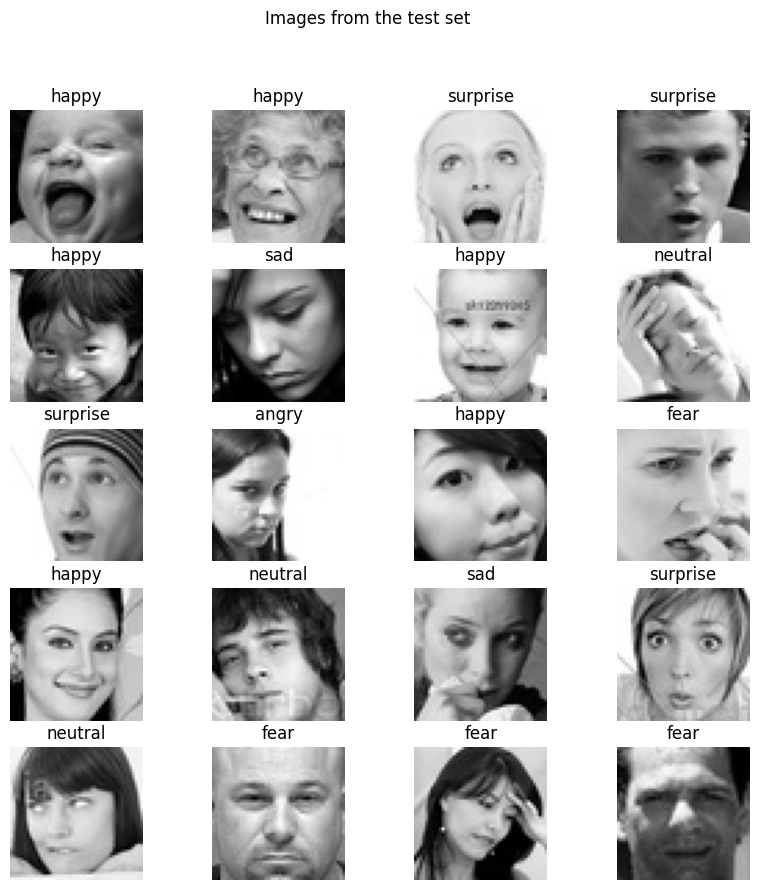

In [26]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_test))
    plt.imshow(X_test[a],cmap="gray")
    plt.title(y_test[a])
    plt.axis("off")
plt.suptitle("Images from the test set")
plt.show()

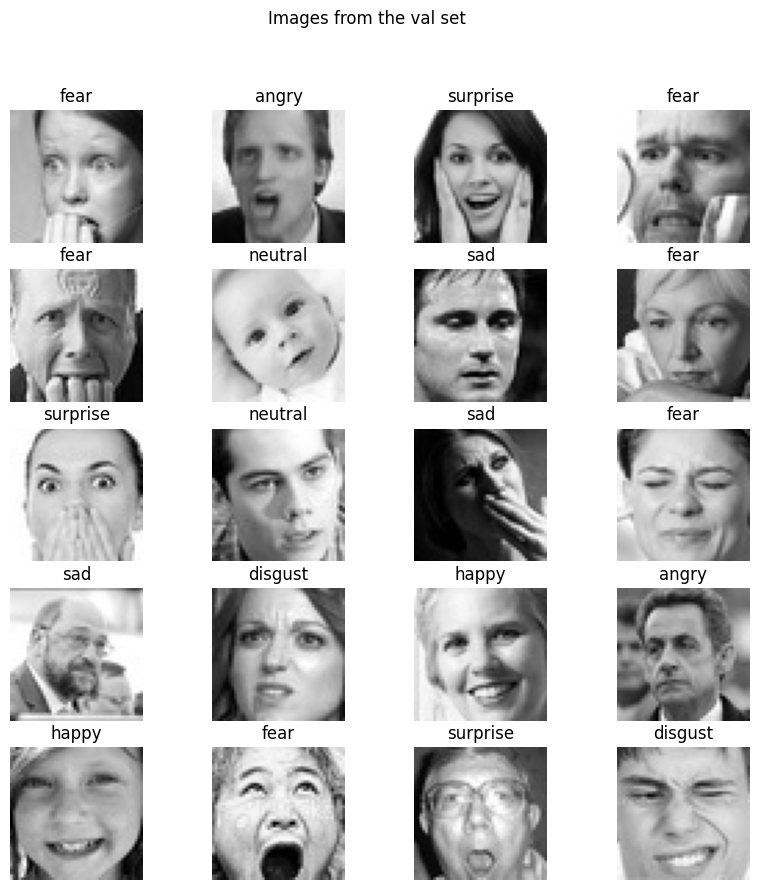

In [27]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    a=np.random.randint(0,len(X_val))
    plt.imshow(X_val[a],cmap="gray")
    plt.title(y_val[a])
    plt.axis("off")
plt.suptitle("Images from the val set")
plt.show()

In [28]:
le=LabelEncoder()

In [29]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
y_val=le.transform(y_val)

In [30]:
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)

In [31]:
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [32]:
X_val = tf.stack(X_val)
y_val = tf.stack(y_val)

In [33]:
model=Sequential([
    InputLayer(input_shape=(48,48,1)),
    Rescaling(1./255),
    Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"),
    MaxPool2D(pool_size=(2,2),padding="same"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"),
    MaxPool2D(pool_size=(2,2),padding="same"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"),
    MaxPool2D(pool_size=(2,2),padding="same"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"),
    MaxPool2D(pool_size=(2,2),padding="same"),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"),
    Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"),
    MaxPool2D(pool_size=(2,2),padding="same"),
    BatchNormalization(),
    Dropout(0.4),
    Flatten(),
    Dense(512,activation="relu"),
    Dense(256,activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7,activation="softmax")
])

In [34]:
num_epochs=100

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 16)       64        
 ormalization)                                          

In [37]:
history = model.fit(X_train, y_train,epochs=num_epochs,validation_data=(X_val, y_val),batch_size=128)

Epoch 1/100


2024-10-24 10:33:33.208748: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 25s 26ms/step - loss: 1.9989 - accuracy: 0.2359 - val_loss: 2.1016 - val_accuracy: 0.2503
Epoch 2/100
449/449 [==============================] - 11s 24ms/step - loss: 1.7295 - accuracy: 0.3301 - val_loss: 1.5561 - val_accuracy: 0.3907
Epoch 3/100
449/449 [==============================] - 11s 24ms/step - loss: 1.5432 - accuracy: 0.3991 - val_loss: 1.5213 - val_accuracy: 0.4299
Epoch 4/100
449/449 [==============================] - 11s 24ms/step - loss: 1.4166 - accuracy: 0.4550 - val_loss: 1.4115 - val_accuracy: 0.4682
Epoch 5/100
449/449 [==============================] - 11s 24ms/step - loss: 1.3329 - accuracy: 0.4869 - val_loss: 1.3232 - val_accuracy: 0.4900
Epoch 6/100
449/449 [==============================] - 11s 24ms/step - loss: 1.2722 - accuracy: 0.5173 - val_loss: 1.2797 - val_accuracy: 0.5106
Epoch 7/100
449/449 [==============================] - 11s 24ms/step - loss: 1.2205 - accuracy: 0.5363 - val_loss: 1.2815 - val_accuracy: 0.52

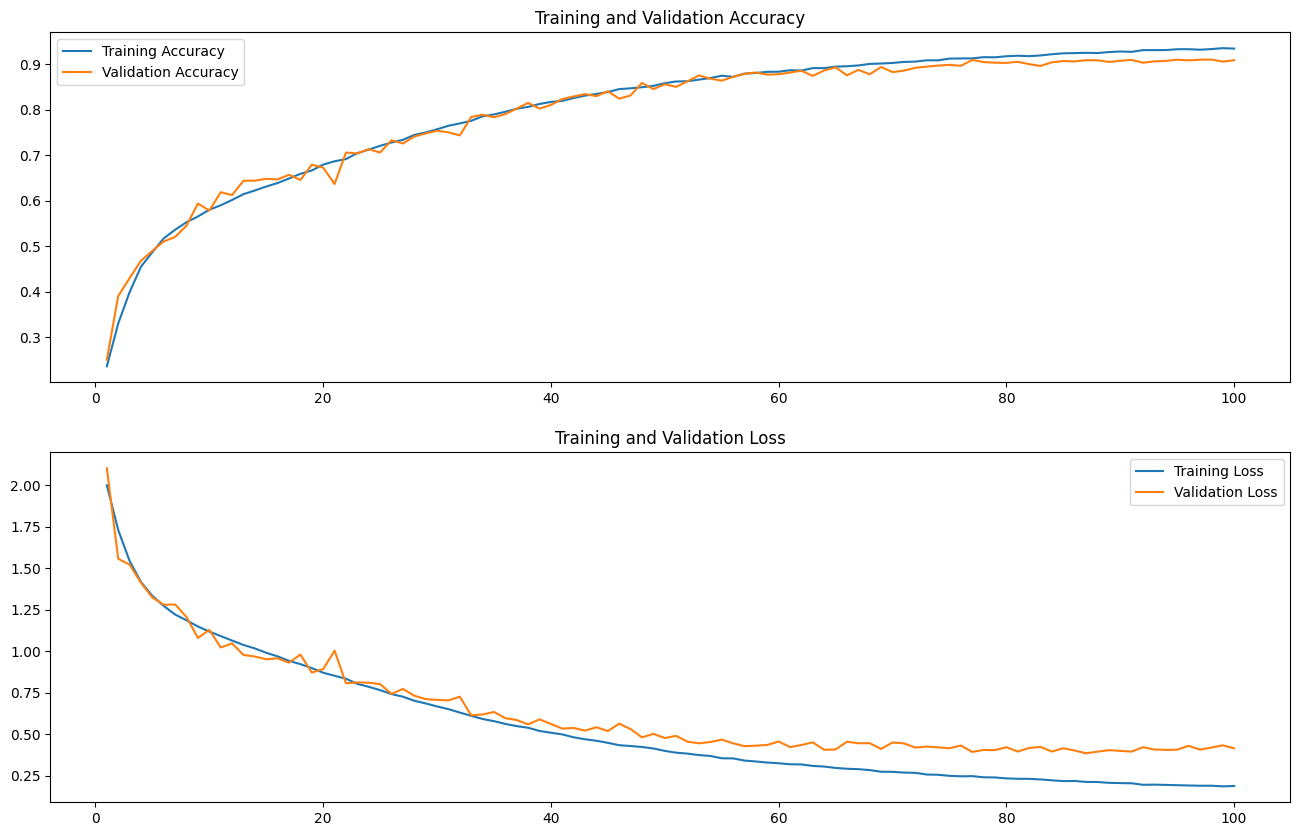

In [38]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
plt.plot(range(1, num_epochs+1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.subplot(2,1,2)
plt.plot(range(1, num_epochs+1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs+1), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [39]:
pred = model.predict(X_test)

225/225 [==============================] - 1s 3ms/step


In [40]:
pred=pred.argmax(axis=1)

In [41]:
scores = model.evaluate(X_test, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.3812 - accuracy: 0.9149


In [42]:
scores

[0.3812405467033386, 0.914949893951416]

In [43]:
print(classification_report(y_test,pred,target_names = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']))

              precision    recall  f1-score   support

       Angry       0.92      0.88      0.90       992
     Disgust       0.91      0.93      0.92       110
        Fear       0.90      0.87      0.88      1025
       Happy       0.97      0.97      0.97      1799
     Neutral       0.89      0.90      0.90      1241
         Sad       0.86      0.89      0.87      1216
    Surprise       0.95      0.94      0.94       801

    accuracy                           0.91      7184
   macro avg       0.91      0.91      0.91      7184
weighted avg       0.92      0.91      0.91      7184



In [44]:
model.save('Facial_expression_model.h5')